In [11]:
%run 'RunAnalysis.py'


Dont forget you will need to restart the kernel for any edits you have made to Analysis.py to take effect, before running RunAnalysis.py!

Please enter a comma-seperated list of decay chains.
Use '+' to add data sets together.
Write 'text' if you would prefer to read a list from 'input.txt':

Would you like to run in fast mode to only analyse 1% of data? (yes/no)
Analysing 2lep...
A
2.884 seconds
B
10.369 seconds
C
15.051 seconds
D
22.692 seconds
Analysing Zee...
135.919 seconds
Analysing Zmumu...
124.395 seconds
Analysing Ztautau...
1.070 seconds
Run completed!


In [12]:
# Making essential imports - This cell only needs to be run ONCE for every new kernel
import ROOT as r
from ROOT import *
import os

In [13]:
# Open .root file - replace the first arguement with the name of the file
histFile = r.TFile.Open("out/Zee_fast.root","READ")

# Read in histograms - keep variable names clear and suitable for each histogram
# The argument of the 'Get()' function should be the name of the histogram you want to view
# To find out what the histogram names are, look at Analysis.py
hist_3lep_pt = histFile.Get("h_3lep_pt")
hist_lep_pt_mean = histFile.Get("h_lep_pt_mean")

# Change the histogram directories so that they do not disappear once the root file has been closed
hist_3lep_pt.SetDirectory(0)
hist_lep_pt_mean.SetDirectory(0)

# Close .root file
histFile.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2


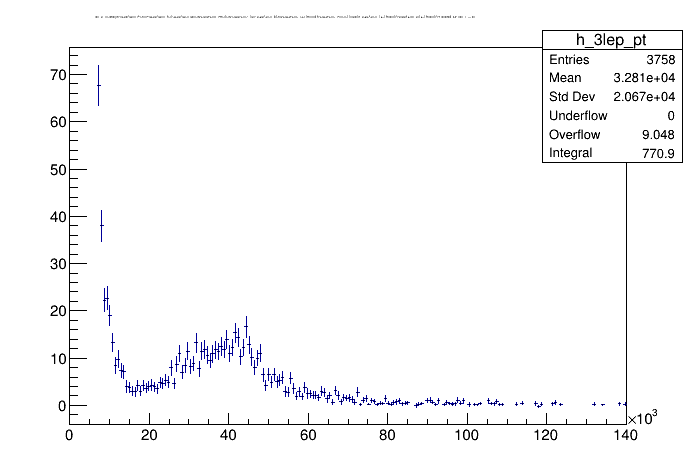

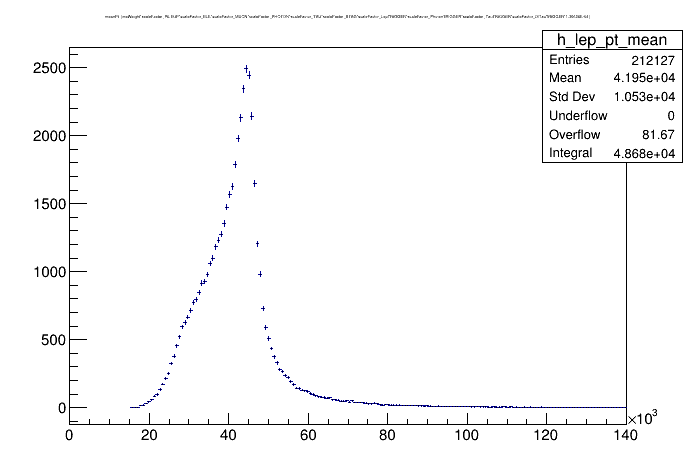

In [14]:
# Allow 'integral' value to be shown in statistics box of all histograms
gStyle.SetOptStat(1111111)

# This next block of code is used to display one histogram - its style must be repeated for every histogram you want to plot.

# FIRST HISTOGRAM

# Make the first canvas 
# For simplicity the variable referring to the canvas should be the same as its name (given by the argument of "TCanvas()")
canvas1 = r.TCanvas("canvas1")

# Draw out the first histogram of your choice onto the canvas
hist_3lep_pt.Draw()

# Show historgram by displaying the canvas
canvas1.Draw()

# SECOND HISTOGRAM

# Make a second canvas
canvas2 = r.TCanvas("canvas2")

# Draw out the second histogram onto this new canvas
hist_lep_pt_mean.Draw()

# Show historgram by displaying this new canvas
canvas2.Draw()

It is important to note that any canvas' you make showing histograms can be saved as images on your computer by right-clicking the image and selecting "Save image as..."

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasstack


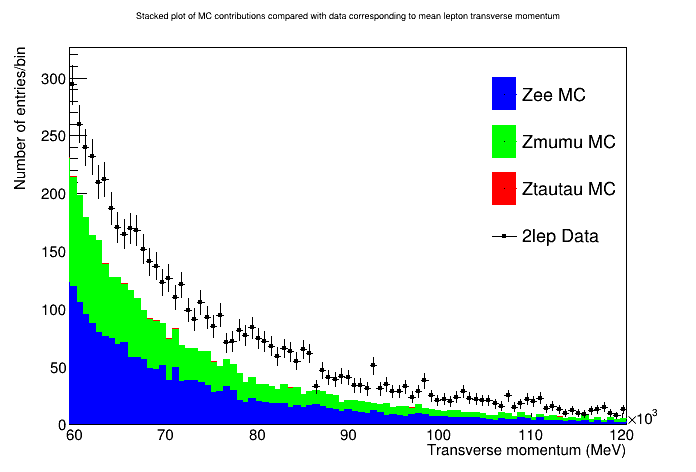

In [15]:
# Opening files up
histFile_2lep = r.TFile.Open("out/2lep_fast.root","READ")
histFile_Zee = r.TFile.Open("out/Zee_fast.root","READ")
histFile_Zmumu = r.TFile.Open("out/Zmumu_fast.root","READ")
histFile_Ztautau = r.TFile.Open("out/Ztautau_fast.root","READ")

# Get histograms
dataHist = histFile_2lep.Get("h_lep_pt_mean")
mcHist_Zee = histFile_Zee.Get("h_lep_pt_mean")
mcHist_Zmumu = histFile_Zmumu.Get("h_lep_pt_mean")
mcHist_Ztautau = histFile_Ztautau.Get("h_lep_pt_mean")

# Change the histograms directory once read in so that they do not get delected when files close
dataHist.SetDirectory(0)
mcHist_Zee.SetDirectory(0)
mcHist_Zmumu.SetDirectory(0)
mcHist_Ztautau.SetDirectory(0)

# Close the files
histFile_2lep.Close()
histFile_Zee.Close()
histFile_Zmumu.Close()
histFile_Ztautau.Close()

# MAKING A STACKED PLOT - ALL MC CONTRIBUTIONS STACKED ON TOP OF EACH OTHER, COMPARED WITH DATA

# Make a canvas
canvasstack = r.TCanvas("canvasstack")

# Make a stacked histogram
hs = r.THStack("hs","Stacked plot")

# Configure and plot the 2lep data
dataHist.SetTitle("Stacked plot of MC contributions compared with data corresponding to mean lepton transverse momentum")
dataHist.GetXaxis().SetTitle("Transverse momentum (MeV)")
dataHist.GetYaxis().SetTitle("Number of entries/bin")
dataHist.SetStats(0)
dataHist.SetLineColor(r.kBlack)
dataHist.SetLineWidth(1)
dataHist.SetMarkerColor(r.kBlack)
dataHist.SetMarkerStyle(21)
dataHist.SetMarkerSize(0.5)
dataHist.Draw("e")

# Add MC contributions to the stacked histogram
mcHist_Zee.SetLineColor(r.kBlue)
mcHist_Zee.SetFillColor(r.kBlue)
hs.Add(mcHist_Zee,"h")
mcHist_Zmumu.SetLineColor(r.kGreen)
mcHist_Zmumu.SetFillColor(r.kGreen)
hs.Add(mcHist_Zmumu,"h")
mcHist_Ztautau.SetLineColor(r.kRed)
mcHist_Ztautau.SetFillColor(r.kRed)
hs.Add(mcHist_Ztautau,"h")

# Draw the stacked plot onto the canvas
hs.Draw("same,hist")

# Draw the data on the same canvas
dataHist.Draw("e,same")

# Edit the x axis range of both stacked plot and data
hs.GetXaxis().SetRangeUser(60e3,120e3)
dataHist.GetXaxis().SetRangeUser(60e3,120e3)

# Add a legend to the plot
legend = r.TLegend(0.7,0.45,0.9,0.85)
legend.AddEntry(mcHist_Zee,"Zee MC")
legend.AddEntry(mcHist_Zmumu,"Zmumu MC")
legend.AddEntry(mcHist_Ztautau,"Ztautau MC")
legend.AddEntry(dataHist,"2lep Data")
legend.SetLineWidth(0)
legend.Draw("same")

# Plot the canvas
canvasstack.Draw()
